In [1]:
from bs4 import BeautifulSoup
import requests

import matplotlib.pyplot as plt

In [2]:
class Parser:
    def __init__(self):
        self.url = "https://ru.investing.com/currencies/usd-rub-historical-data"
        self.response = requests.get(self.url)
        self.soup = BeautifulSoup(self.response.content, 'html.parser')


    def get_header(self):
        return self.soup.find('h1', class_="mb-2.5 text-left text-xl font-bold leading-7 text-[#232526] md:mb-2 md:text-3xl md:leading-8 rtl:soft-ltr")


    def __get_rows(self):
        self.rows = self.soup.find_all('tr', class_="relative h-[41px] after:absolute after:bottom-0 after:left-0 after:right-0 after:h-px after:bg-[#ECEDEF] hover:bg-[#F5F5F5] historical-data-v2_price__atUfP")
        

    def print_date_and_price(self):
        self.__get_rows()
        for row in self.rows:
            date_cell = row.find('time')
            date = date_cell.text

            price_cells = row.find_all('td')
            price = price_cells[1].text if len(price_cells) > 1 else "Цена не найдена"

            print(f"Дата: {date}, Цена: {price}")


    def __get_arr_dates(self):
        self.__get_rows()
        dates = []
        for row in self.rows:
            date_cell = row.find('time')
            dates.append(date_cell.text)

        return dates


    def __get_arr_prices(self):
        self.__get_rows()
        prices = []
        for row in self.rows:
            price_cells = row.find_all('td')
            price_cell = price_cells[1].text.replace(',', '.')
            prices.append(float(price_cell))

        return prices

            
    def print_graph(self): 
        dates = self.__get_arr_dates()  
        prices = self.__get_arr_prices()  

        plt.plot(dates, prices, marker='o')  
        
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend(["Цена"])

        plt.xticks(rotation=-90)
        
        # plt.savefig("graph.png")
        # print("График сохранен как graph.png")
        plt.show()

USD/RUB - Доллар США Российский рубль



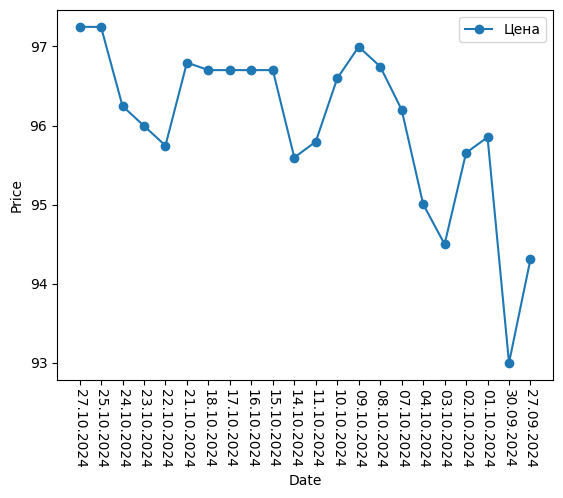

In [3]:
def main():
    pars = Parser()
    print(f"{pars.get_header().text}\n")
    
    # pars.print_date_and_price()
    pars.print_graph()


if __name__ == "__main__":
    main()